<a href="https://colab.research.google.com/github/Redwolf0023/AutoMLvsBayesian/blob/main/Loan_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install swig -y
!pip install Cython numpy
!pip install scikit-learn
!apt-get install default-jre
!java -version
!pip install h2o

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 2s (495 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
de

In [ ]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("loan_data.csv")

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
# encode the target variable
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['purpose'] = LE.fit_transform(df['purpose'])

In [ ]:
# initialise the cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpu02l5c9v
  JVM stdout: /tmp/tmpu02l5c9v/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpu02l5c9v/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_unknownUser_ur55ju
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# parse the dataset
data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
target_col = data.columns[-1]
feature_col = data.columns[:-1]
data[target_col] = data[target_col].asfactor()

In [ ]:
train, test, validation = data.split_frame(ratios=[0.8, 0.15], seed = 12)

In [ ]:
# train the h2o model
model = H2OAutoML(max_models=15, seed = 1234)
model.train(x = feature_col, y = target_col, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20230818_194712,0.68819,0.430611,0.342338,0.3587,0.366498,0.134321,9004,0.114521,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230818_194712,0.687029,0.43135,0.340875,0.363557,0.366798,0.134541,8481,0.099935,StackedEnsemble
GLM_1_AutoML_1_20230818_194712,0.678746,0.433246,0.326763,0.373775,0.367551,0.135094,1124,0.006904,GLM
XGBoost_grid_1_AutoML_1_20230818_194712_model_2,0.678717,0.434363,0.325482,0.372149,0.367922,0.135367,2170,0.008777,XGBoost
GBM_1_AutoML_1_20230818_194712,0.675431,0.435064,0.315345,0.370131,0.36869,0.135932,1397,0.01978,GBM
GBM_2_AutoML_1_20230818_194712,0.669583,0.437506,0.306045,0.373402,0.369534,0.136555,430,0.015677,GBM
GBM_5_AutoML_1_20230818_194712,0.667756,0.436763,0.319242,0.383664,0.368748,0.135975,360,0.014687,GBM
DeepLearning_1_AutoML_1_20230818_194712,0.66648,0.450287,0.309279,0.364048,0.376866,0.142028,1071,0.010389,DeepLearning
XGBoost_1_AutoML_1_20230818_194712,0.665974,0.459495,0.269627,0.360246,0.378134,0.142985,4737,0.030449,XGBoost
DRF_1_AutoML_1_20230818_194712,0.663007,0.465138,0.296057,0.357532,0.370996,0.137638,2072,0.047082,DRF


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230818_194712

,0,1,Error,Rate
0,763.0,431.0,0.361,(431.0/1194.0)
1,93.0,161.0,0.3661,(93.0/254.0)
Total,856.0,592.0,0.3619,(524.0/1448.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

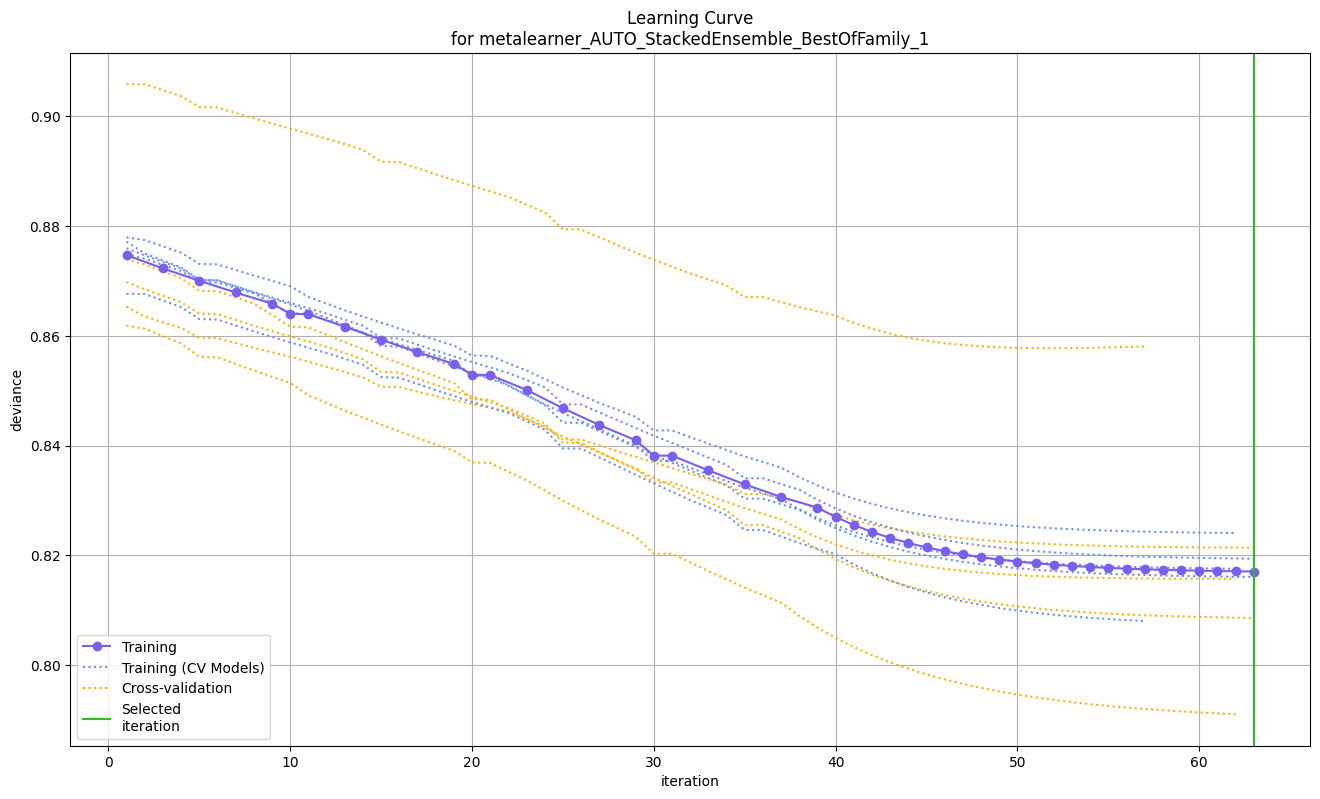

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

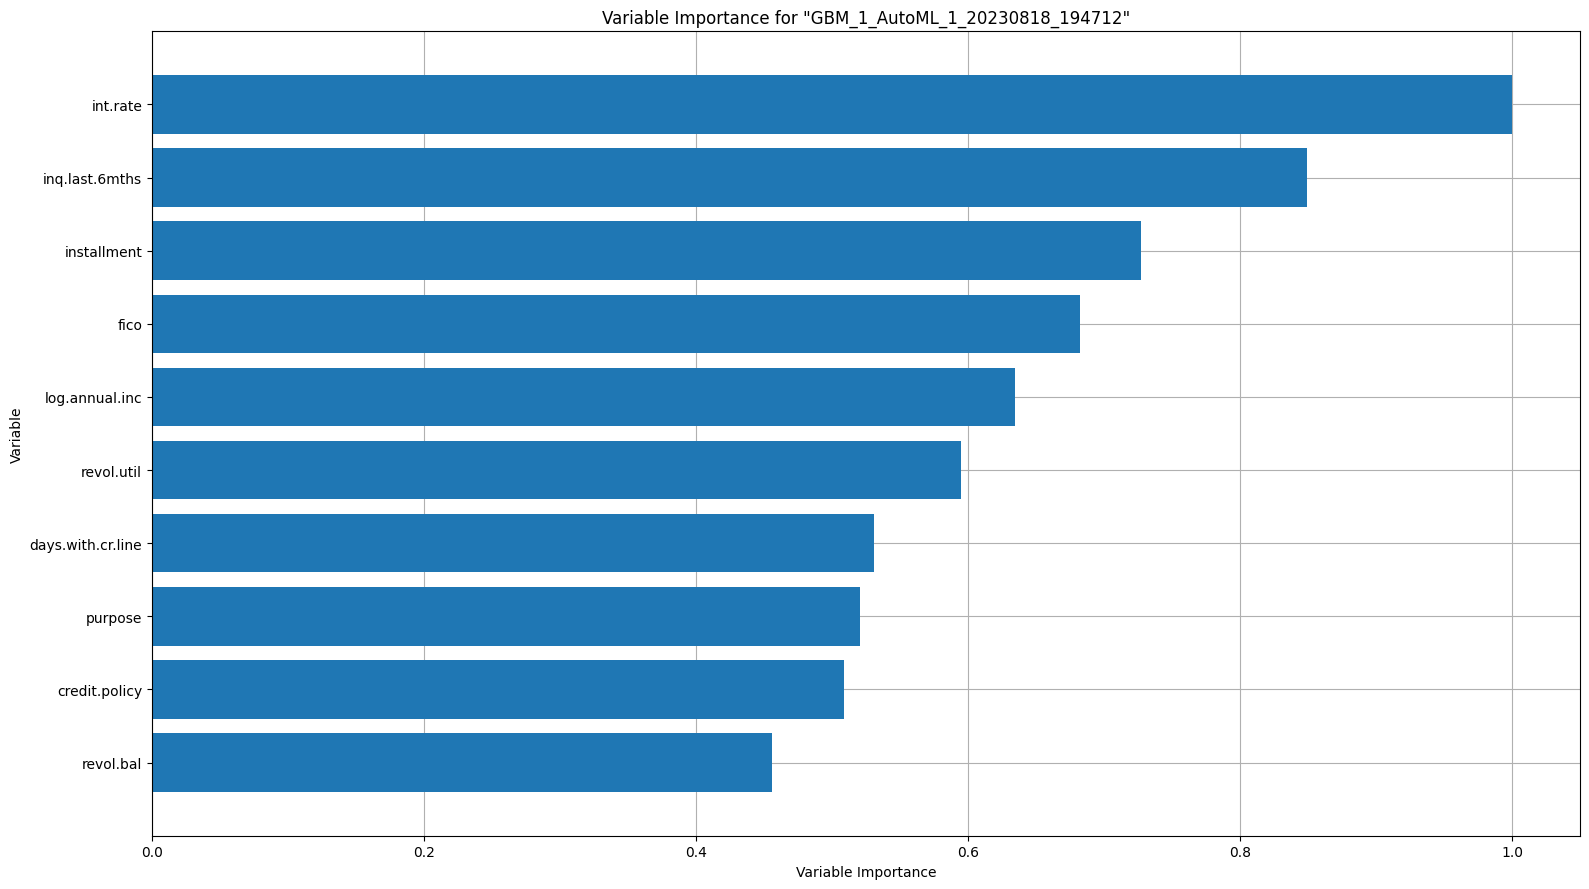

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

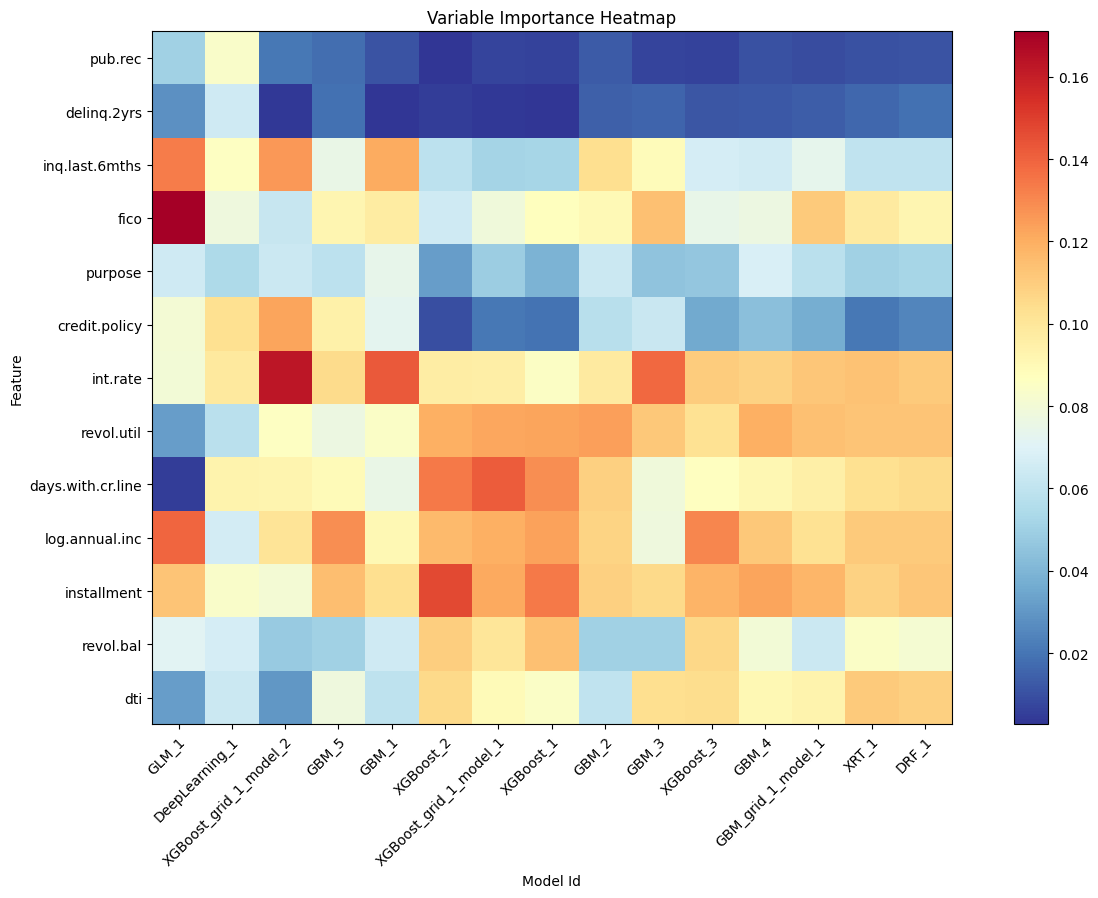

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

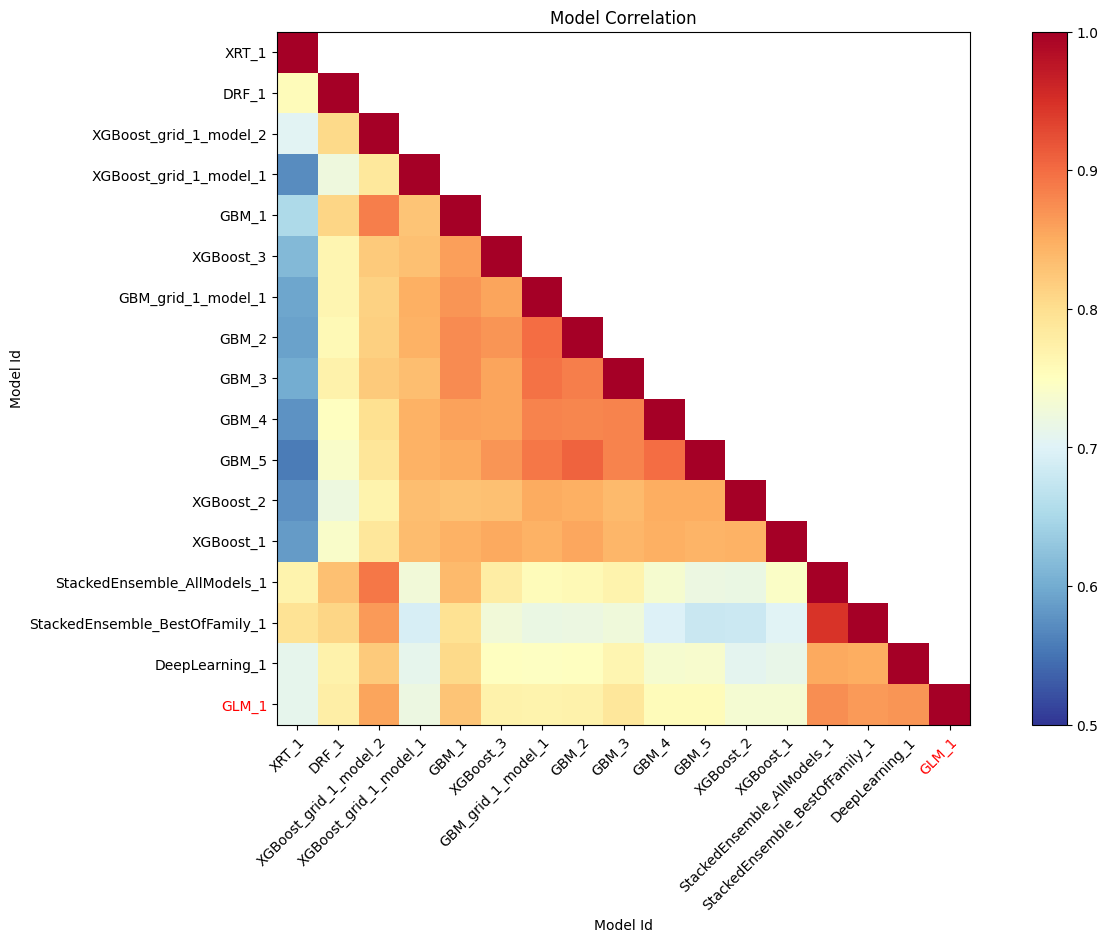

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

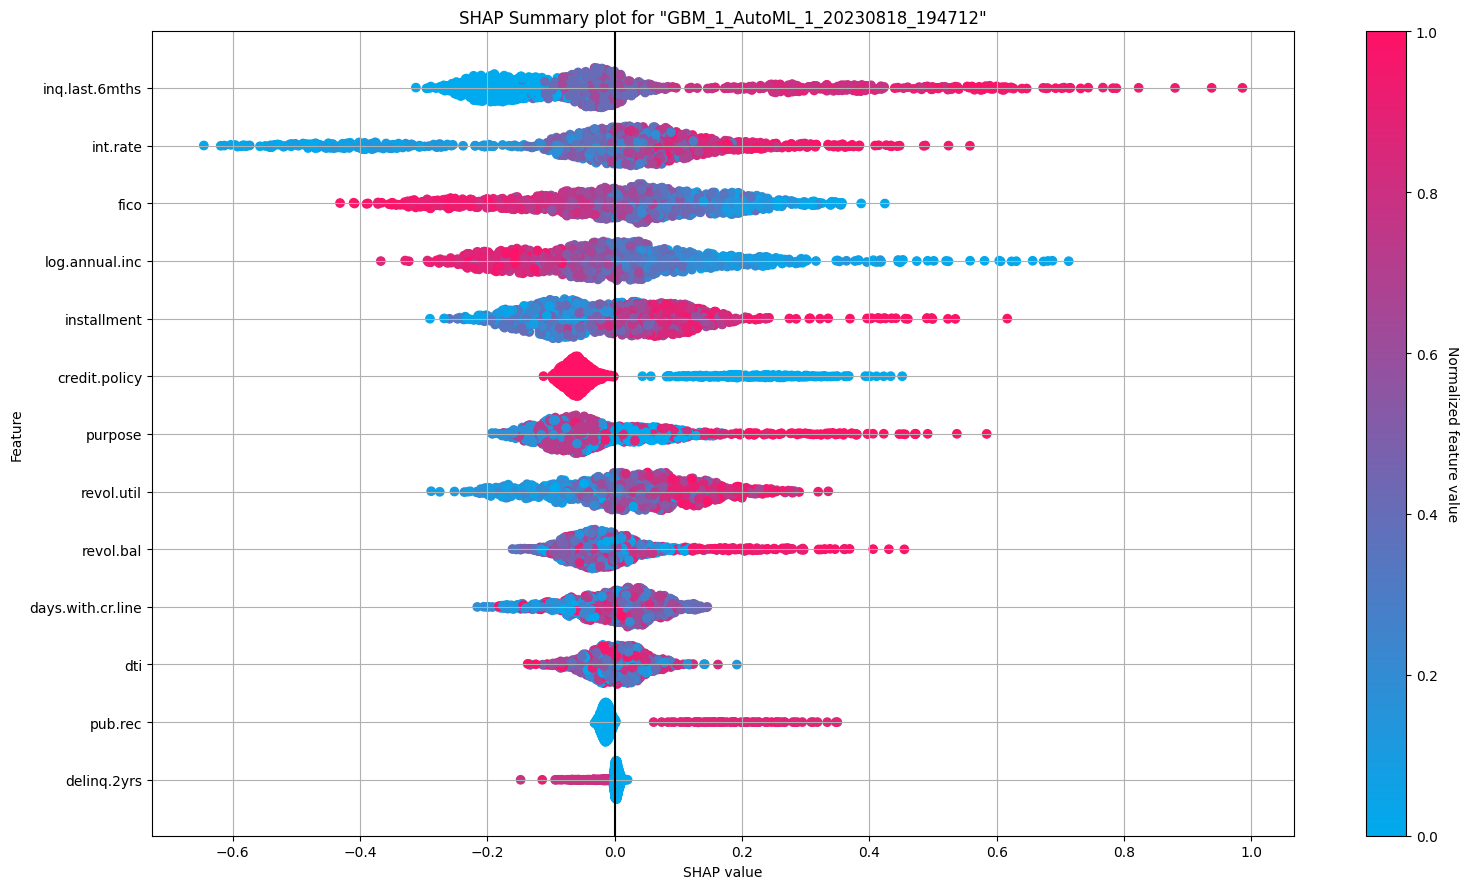

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

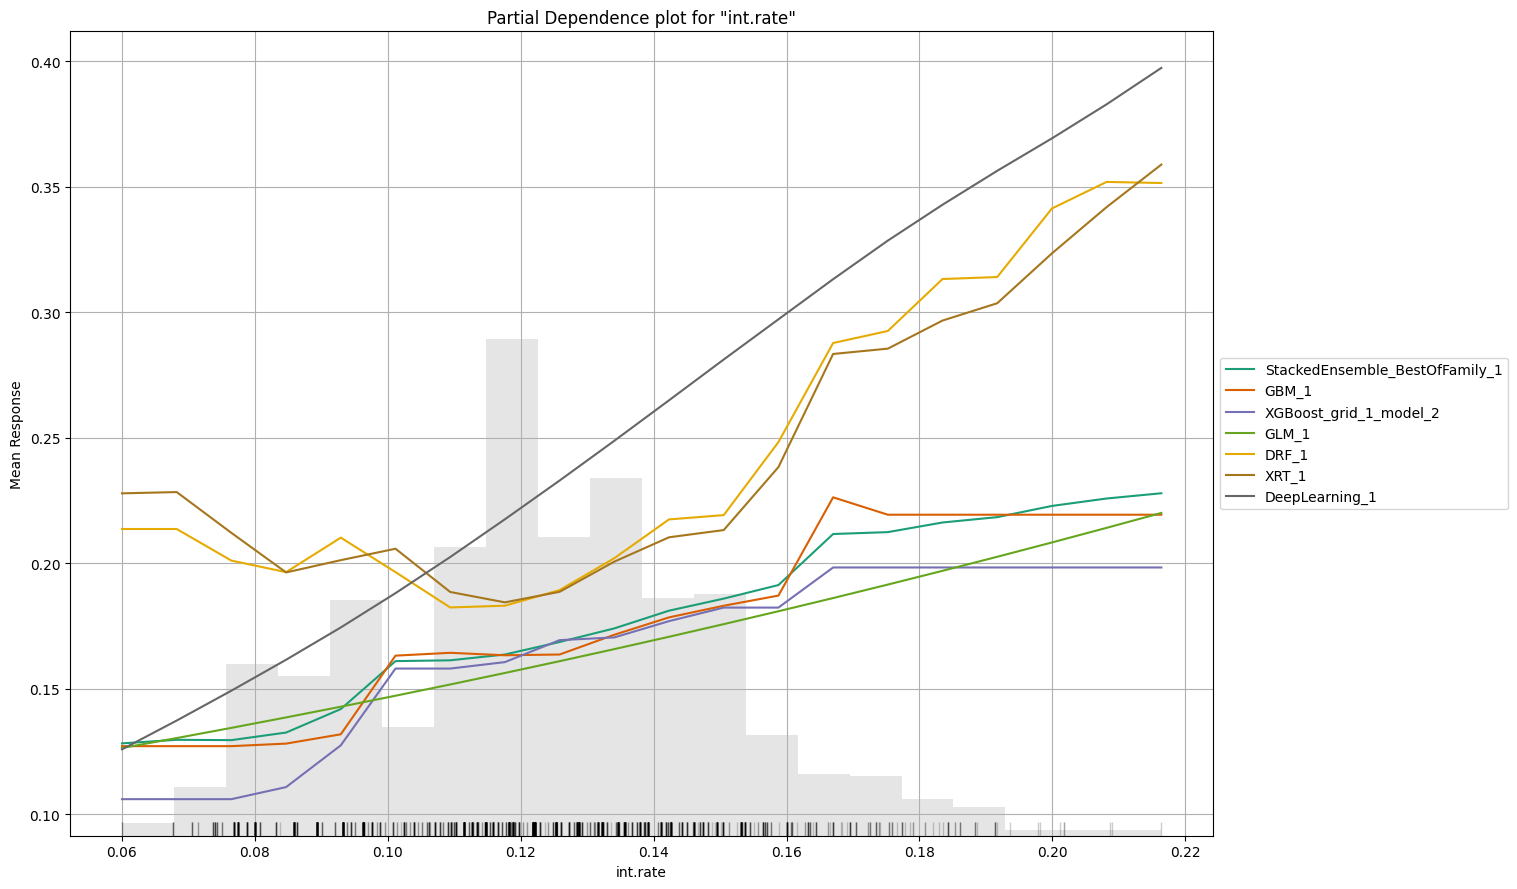

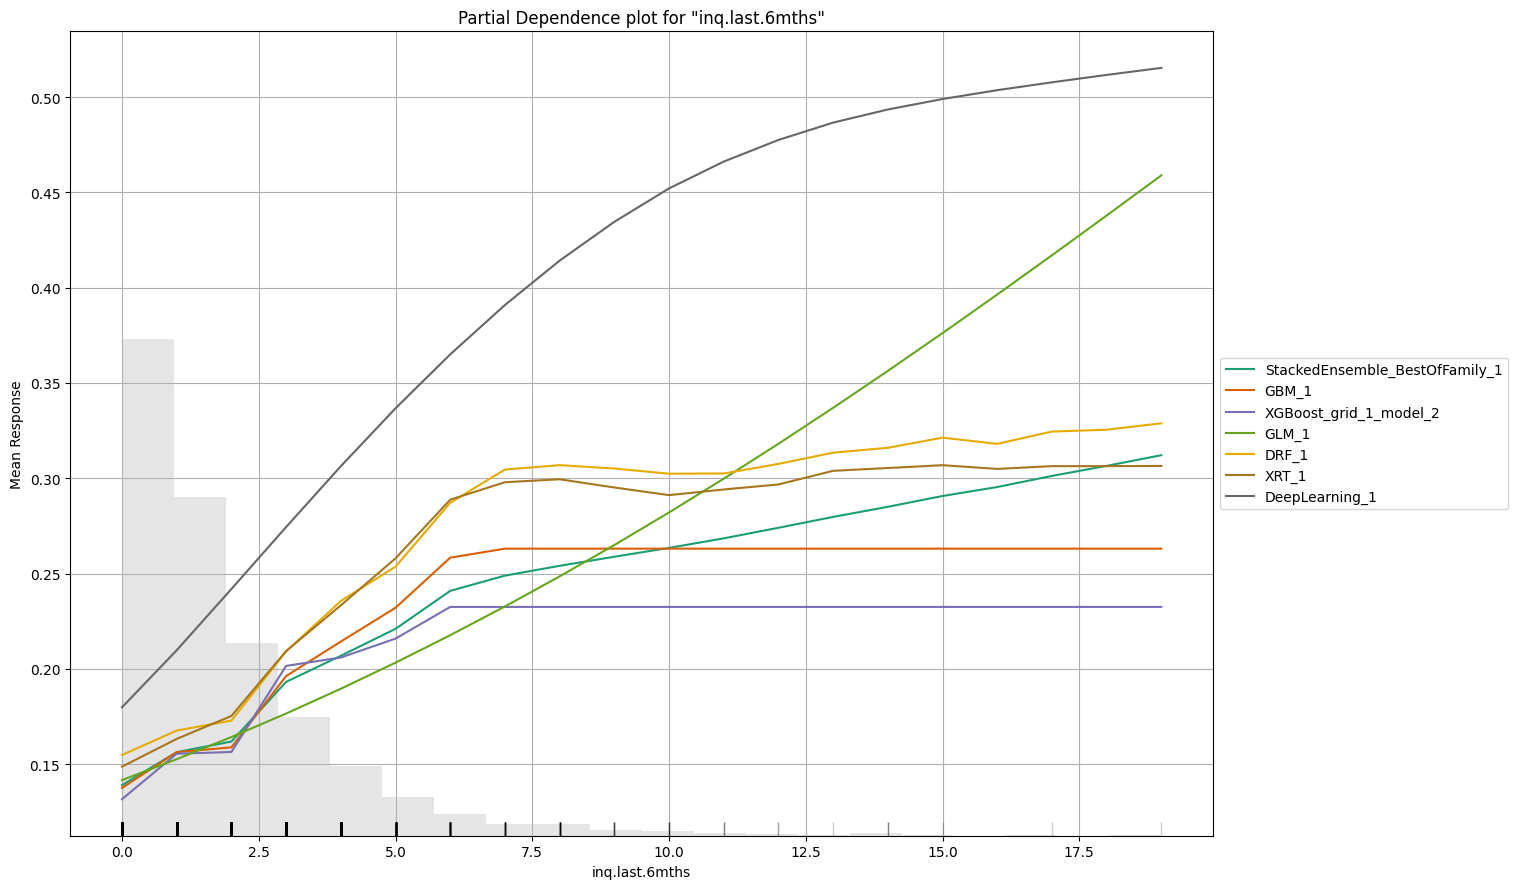

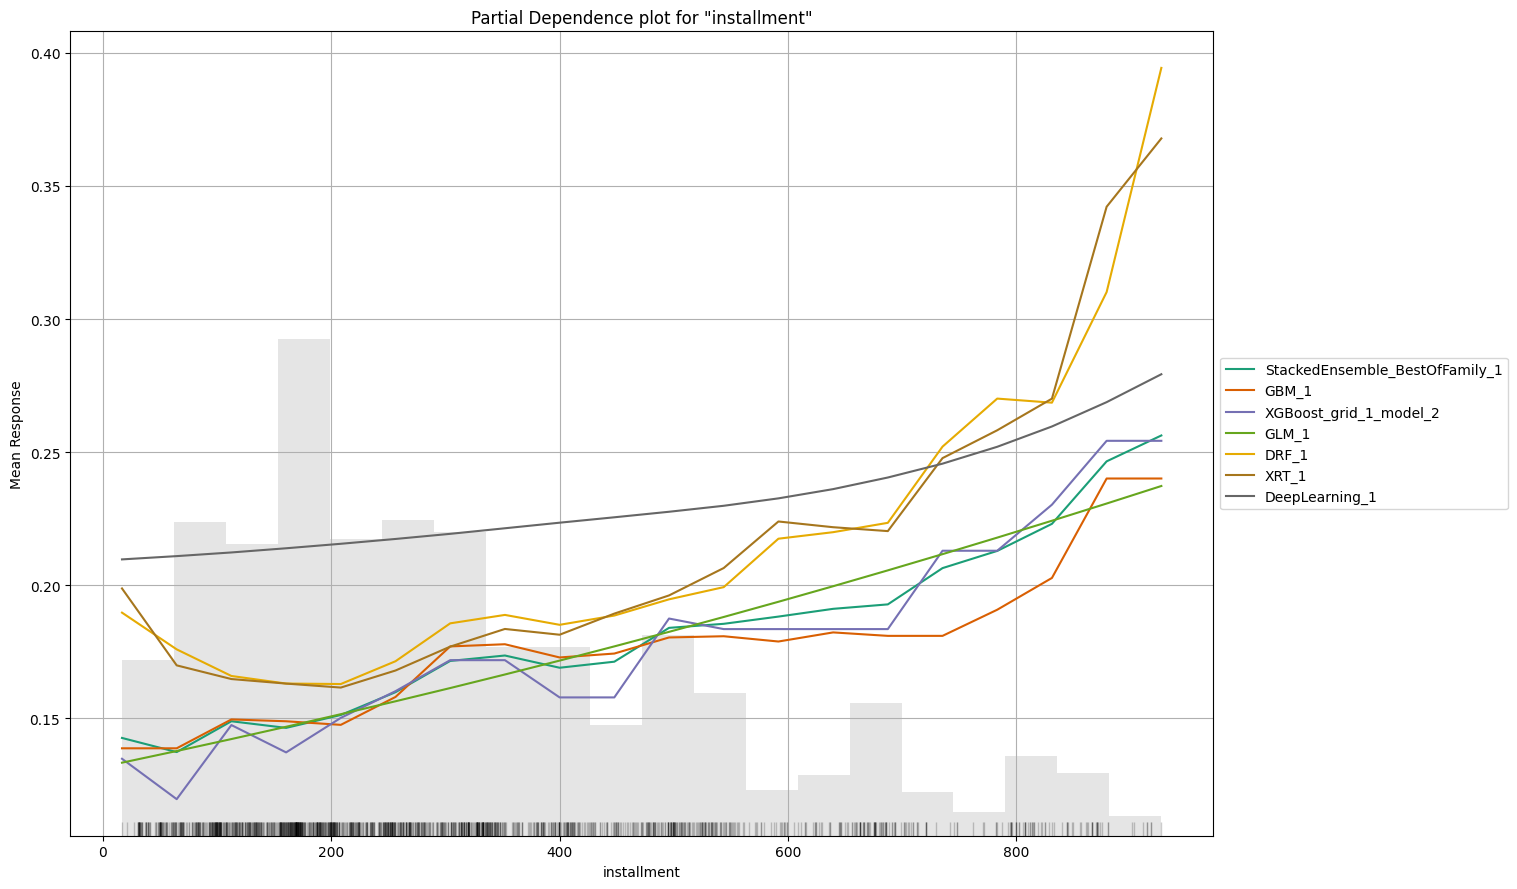

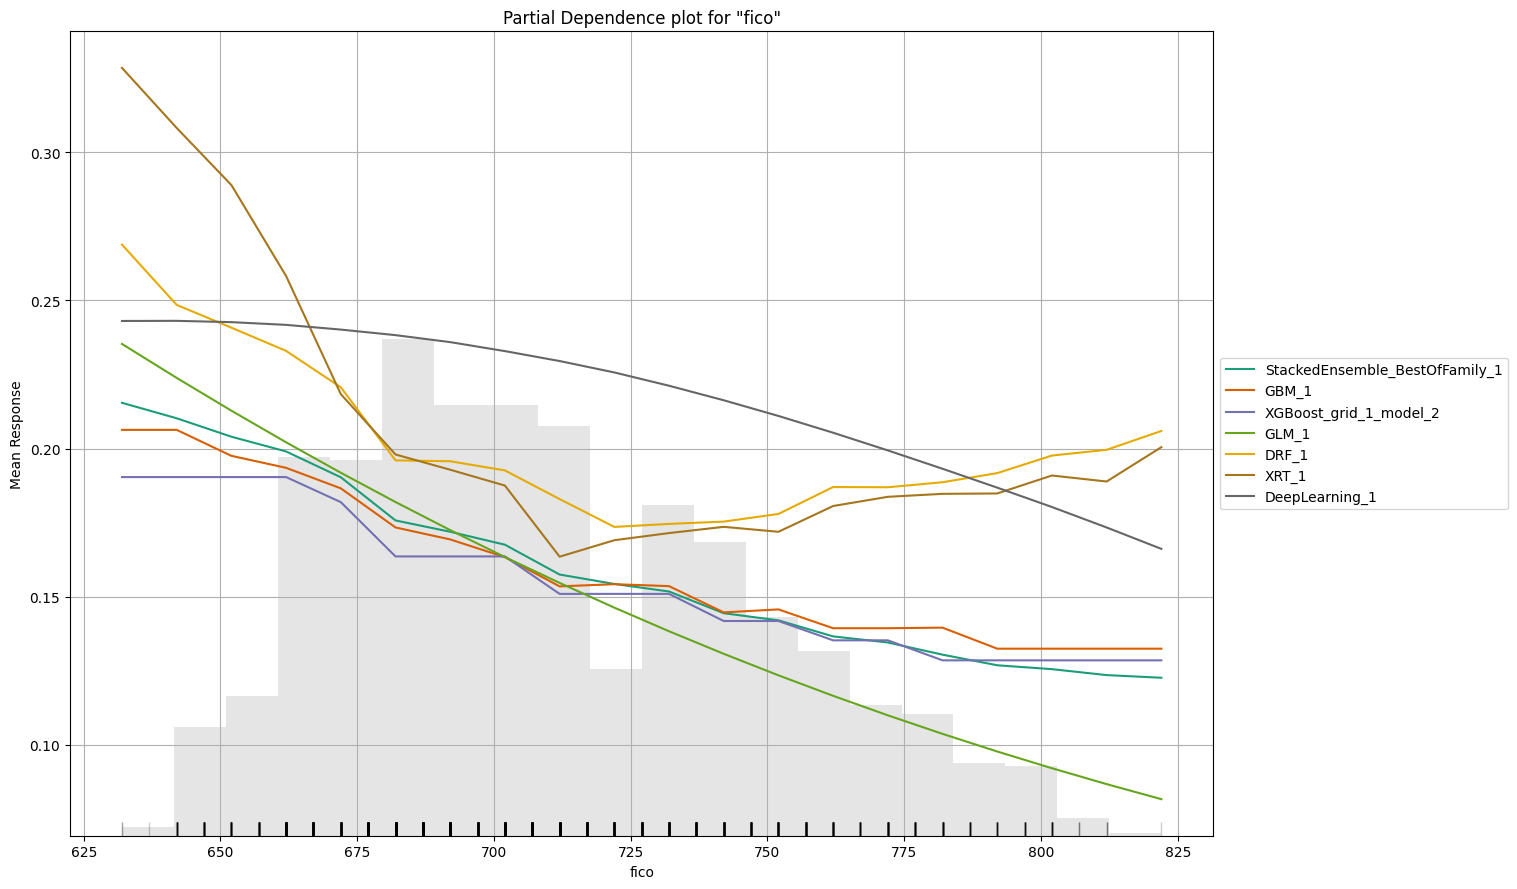

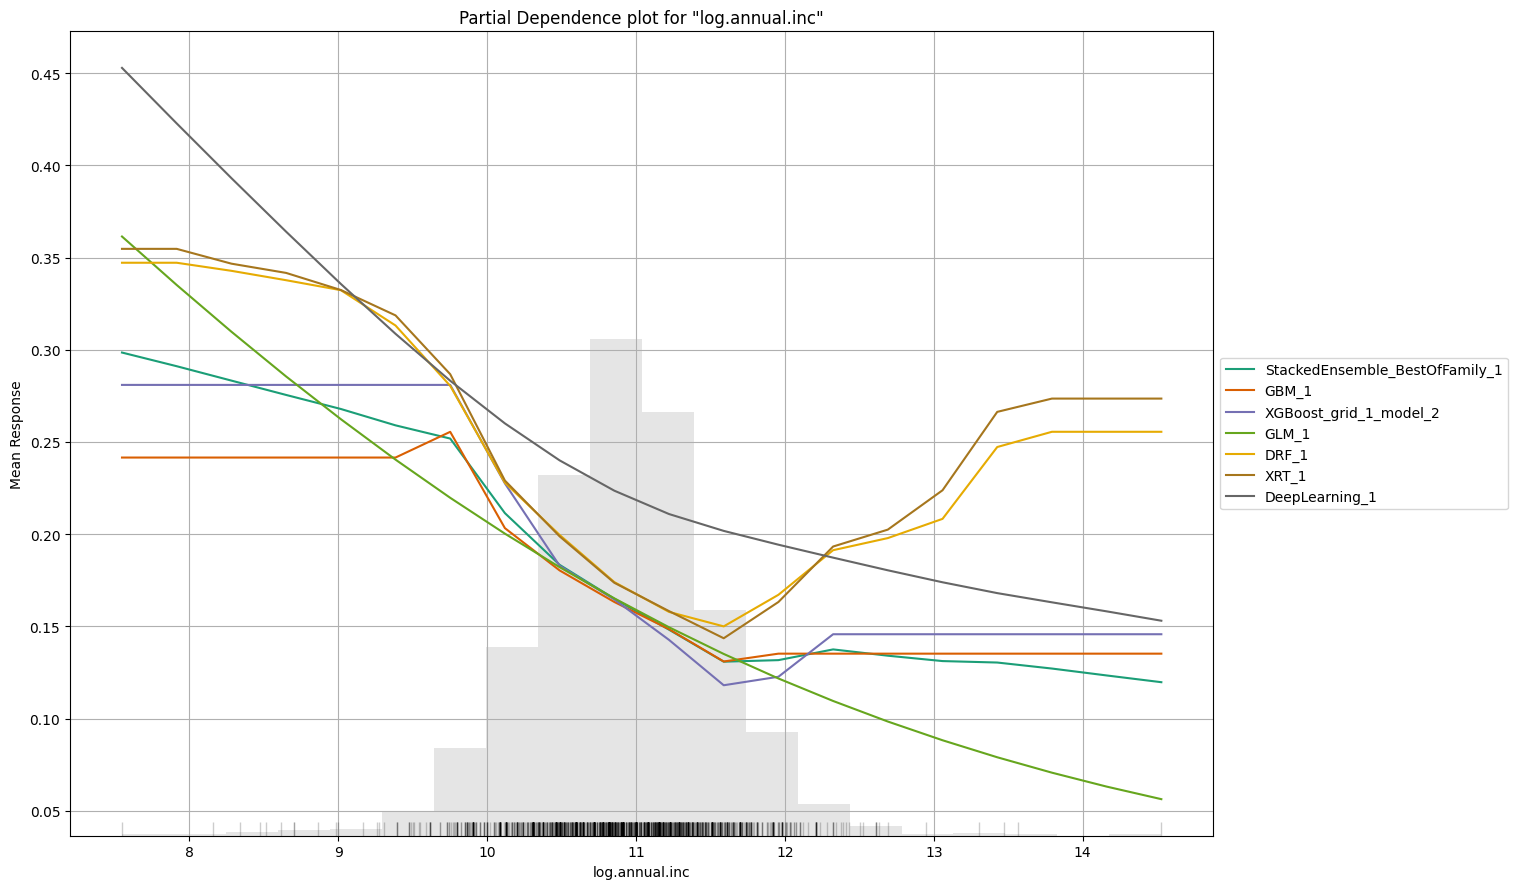

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20230818_194712,0.68819,0.430611,0.342338,0.3587,0.366498,0.134321,9004,0.114521,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230818_194712,0.687029,0.43135,0.340875,0.363557,0.366798,0.134541,8481,0.099935,StackedEnsemble
GLM_1_AutoML_1_20230818_194712,0.678746,0.433246,0.326763,0.373775,0.367551,0.135094,1124,0.006904,GLM
XGBoost_grid_1_AutoML_1_20230818_194712_model_2,0.678717,0.434363,0.325482,0.372149,0.367922,0.135367,2170,0.008777,XGBoost
GBM_1_AutoML_1_20230818_194712,0.675431,0.435064,0.315345,0.370131,0.36869,0.135932,1397,0.01978,GBM
GBM_2_AutoML_1_20230818_194712,0.669583,0.437506,0.306045,0.373402,0.369534,0.136555,430,0.015677,GBM
GBM_5_AutoML_1_20230818_194712,0.667756,0.436763,0.319242,0.383664,0.368748,0.135975,360,0.014687,GBM
DeepLearning_1_AutoML_1_20230818_194712,0.66648,0.450287,0.309279,0.364048,0.376866,0.142028,1071,0.010389,DeepLearning
XGBoost_1_AutoML_1_20230818_194712,0.665974,0.459495,0.269627,0.360246,0.378134,0.142985,4737,0.030449,XGBoost
DRF_1_AutoML_1_20230818_194712,0.663007,0.465138,0.296057,0.357532,0.370996,0.137638,2072,0.047082,DRF


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230818_194712

,0,1,Error,Rate
0,763.0,431.0,0.361,(431.0/1194.0)
1,93.0,161.0,0.3661,(93.0/254.0)
Total,856.0,592.0,0.3619,(524.0/1448.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [ ]:
exm = model.explain(test)
exm

In [ ]:
# import the libraries
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF,ConstantKernel, DotProduct, Matern
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score as ras
from sklearn.model_selection import learning_curve

In [ ]:
x = df.drop('not.fully.paid', axis=1).values
y = df['not.fully.paid'].values

In [ ]:
# standardise the feature column and encode the target variable
from sklearn import preprocessing
SS = preprocessing.StandardScaler()
LE = preprocessing.LabelEncoder()
x = SS.fit_transform(x)
y = LE.fit_transform(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Gaussian Process Classifier using RBF kernel
kernel = 1.0 * RBF()
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Train the Gaussian Process Classifier
gpc.fit(x_train, y_train)

# Make predictions on the test set
predictions = gpc.predict(x_test)

KeyboardInterrupt: ignored

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision_macro = precision_score(y_test, predictions, average='macro')
recall_macro = recall_score(y_test, predictions, average='macro')
f1_macro = f1_score(y_test, predictions, average='macro')
conf_matrix = confusion_matrix(y_test, predictions)
# Calculate the negative log-likelihood
y_probs = gpc.predict_proba(x_test)
log_likelihood = log_loss(y_test, y_probs)

In [ ]:
# Calculate ROC curve and AUC for each class (one-vs-all)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision (Macro-average): {precision_macro}")
print(f"Recall (Macro-average): {recall_macro}")
print(f"F1-Score (Macro-average): {f1_macro}")
print(f"Negative Log-Likelihood: {log_likelihood}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class %d) (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc='lower right')
plt.show()